# Exploratory Data Analysis

# I.Load data

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# target to show plot in jupyter notebook and not external window
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [21]:
df_data = pd.read_csv("./Data/data_predict_price_house.csv")
# Display the first few rows of the dataframe
df_data.head()

,quan,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia
0,Gò Vấp,147.0,479.0,17.0,18.0,16.8
1,Tân Phú,180.0,179.0,13.0,13.0,23.0
2,10,53.0,53.0,2.0,2.0,4.3
3,9,233.0,233.0,28.0,28.0,26.0
4,10,102.0,102.0,2.0,2.0,3.7


In [22]:
# Print the shape of the dataframe
print(df_data.shape)

(4293, 6)


# II EDA

In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quan                  4293 non-null   object 
 1   dien_tich_dat_m2      4293 non-null   float64
 2   dien_tich_su_dung_m2  4293 non-null   float64
 3   phong_ngu             4293 non-null   float64
 4   nha_tam               4293 non-null   float64
 5   gia                   4293 non-null   float64
dtypes: float64(5), object(1)
memory usage: 201.4+ KB


In [24]:
df_data.describe()

,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia
count,4293.000000,4.293000e+03,4293.000000,4293.000000,4293.000000
mean,126.256615,5.513882e+02,4.610063,4.554391,24.983213
std,295.298250,1.831914e+04,4.999423,5.284465,57.364136
min,1.000000,1.000000e+00,1.000000,1.000000,0.000000
25%,58.000000,8.200000e+01,3.000000,2.000000,5.100000
50%,78.000000,1.390000e+02,4.000000,3.000000,9.700000
75%,120.000000,2.900000e+02,5.000000,5.000000,22.000000
max,10000.000000,1.200000e+06,100.000000,100.000000,1279.999000


## 1. Plot data:

### 1.1 Plot full data

+ Mục tiêu visualization data:

Text(0.5, 1.0, 'Distribution of House Prices')

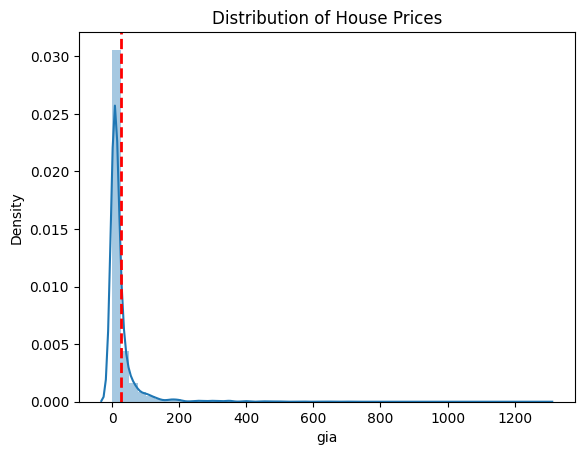

In [25]:
# target variable
sns.distplot(df_data['gia'])
plt.axvline(x=df_data['gia'].mean(), color='red', linestyle='--', linewidth=2)
plt.title('Distribution of House Prices')

### 1.2 Plot with capped data

Text(0.5, 1.0, 'Distribution of House Prices')

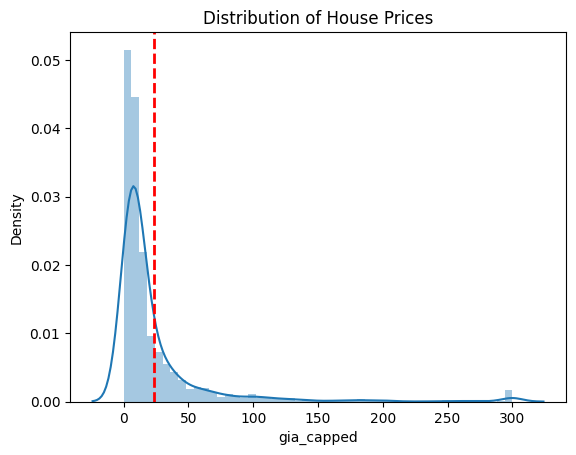

In [26]:
# target variable
df1 = df_data.copy()
upper = df1['gia'].quantile(0.99)
df1['gia_capped'] = df1['gia'].clip(upper=upper)
sns.distplot(df1['gia_capped'])
plt.axvline(x=df1['gia_capped'].mean(), color='red', linestyle='--', linewidth=2)
plt.title('Distribution of House Prices')

### 1.3 Plot with log(gia) - gia transform

Text(0.5, 1.0, 'Distribution of House Prices')

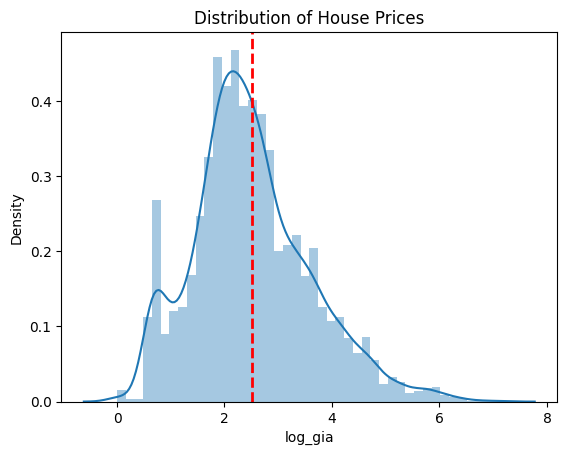

In [27]:
# target variable
df2 = df_data.copy()
df2['log_gia'] = np.log1p(df2['gia'])
sns.distplot(df2['log_gia'])
plt.axvline(x=df2['log_gia'].mean(), color='red', linestyle='--', linewidth=2)
plt.title('Distribution of House Prices')

## 2. Visualize number value missed in data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_missing(df: pd.DataFrame,  min_count: int = 1, figsize=(10, 6)) -> None:
    """
    Vẽ biểu đồ số lượng giá trị thiếu theo cột.
    - min_count: chỉ vẽ những cột có số thiếu >= min_count
    """
    # Đếm thiếu
    missing = df.isna().sum()

    # Lọc theo ngưỡng (mặc định: bỏ các cột không thiếu)
    missing = missing[missing >= min_count]

    # Nếu rỗng thì thông báo và thoát (tránh IndexError)
    if missing.empty:
        print("No missing values.")
        return

    # Sắp xếp tăng dần để khi đảo trục Y, cột thiếu nhất nằm trên cùng
    missing = missing.sort_values(ascending=True)

    # Tính % thiếu
    pct = (missing / len(df) * 100).round(2)

    # Vẽ
    fig, ax = plt.subplots(figsize=figsize)
    missing.plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)

    ax.set_title("Missing Data by Feature", fontsize=14)
    ax.set_xlabel("Number of Missing Values")
    ax.set_ylabel("Feature Name")
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Đưa feature thiếu nhiều lên trên
    ax.invert_yaxis()

    # Ghi nhãn số lượng + %
    for i, (v, p) in enumerate(zip(missing.values, pct.values)):
        ax.text(v, i, f"  {int(v)} ({p}%)", va='center')

    plt.tight_layout()
    plt.show()

# Gọi hàm
plot_missing(df_data)


No missing values.


## 3. Visualization Heatmap of Data without feature quan

+ Feature: quan will pre-processing in next pharse!

### 3.1 Heatmap full data

+ Nhận xét:
    + Có vẻ sự tương quan giữa feature gia và các feature khác trung bình, yếu.

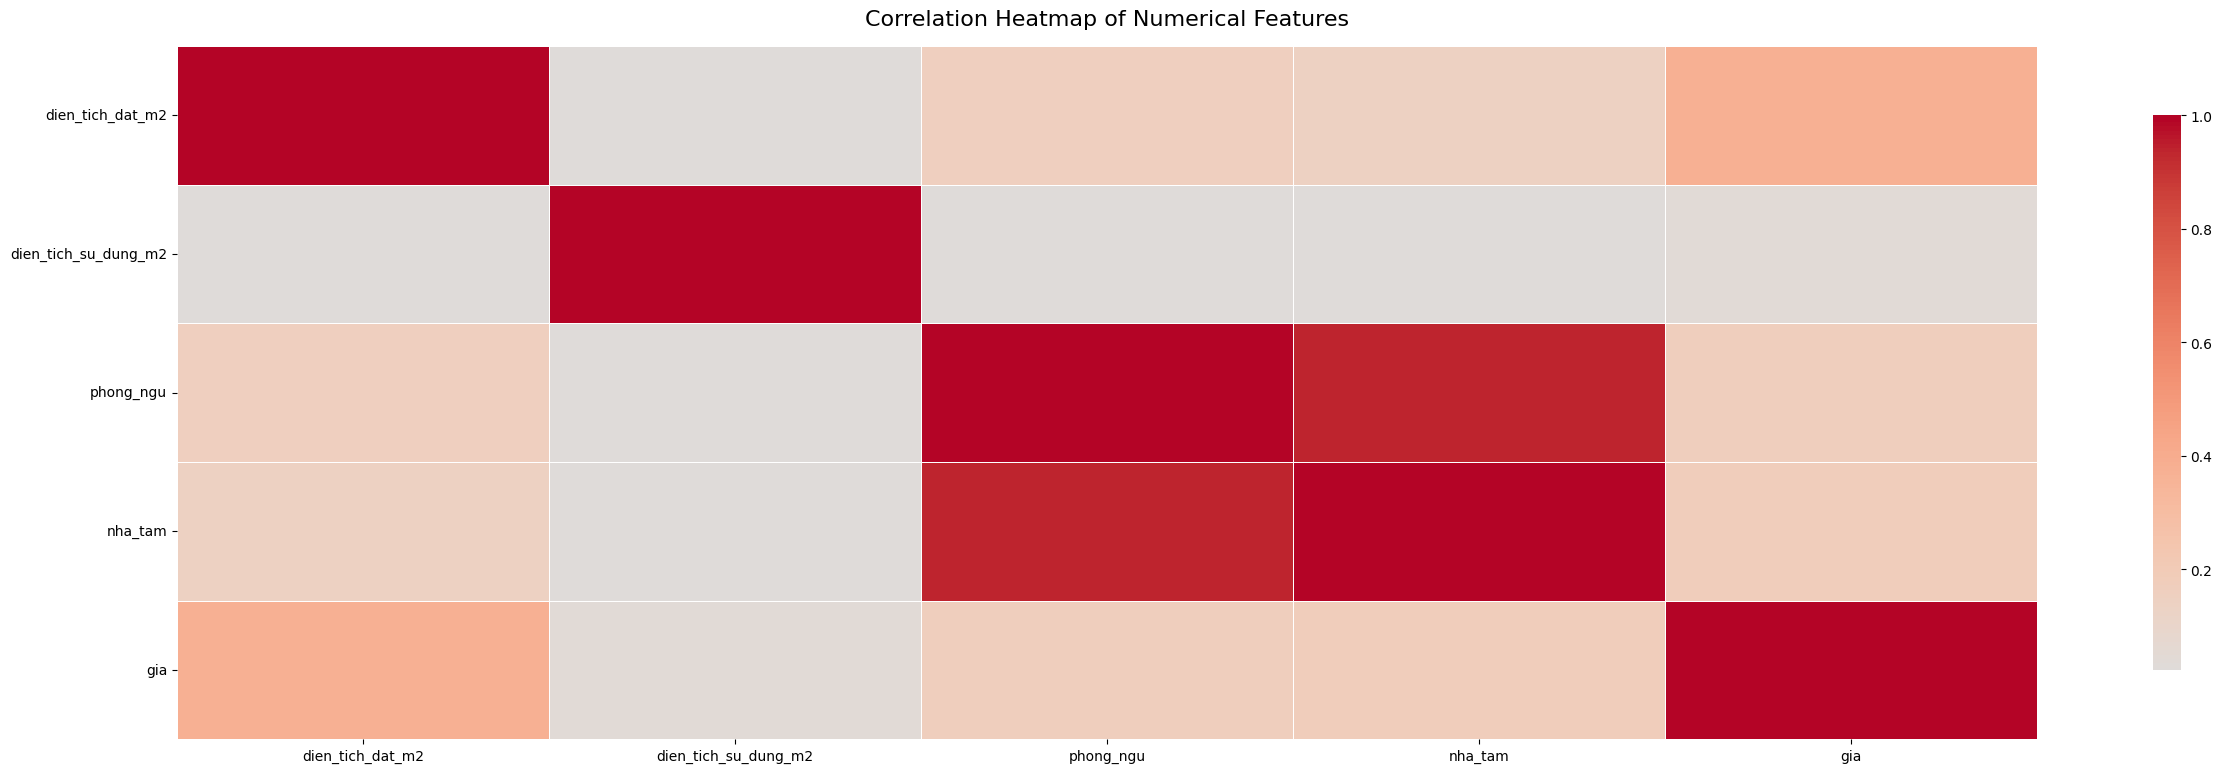

In [29]:
plt.figure(figsize=(30, 9))
sns.heatmap(
    df_data.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()


### 3.2 Heatmap with data gia < 100

+ Có sự tương quan rõ rệt hơn

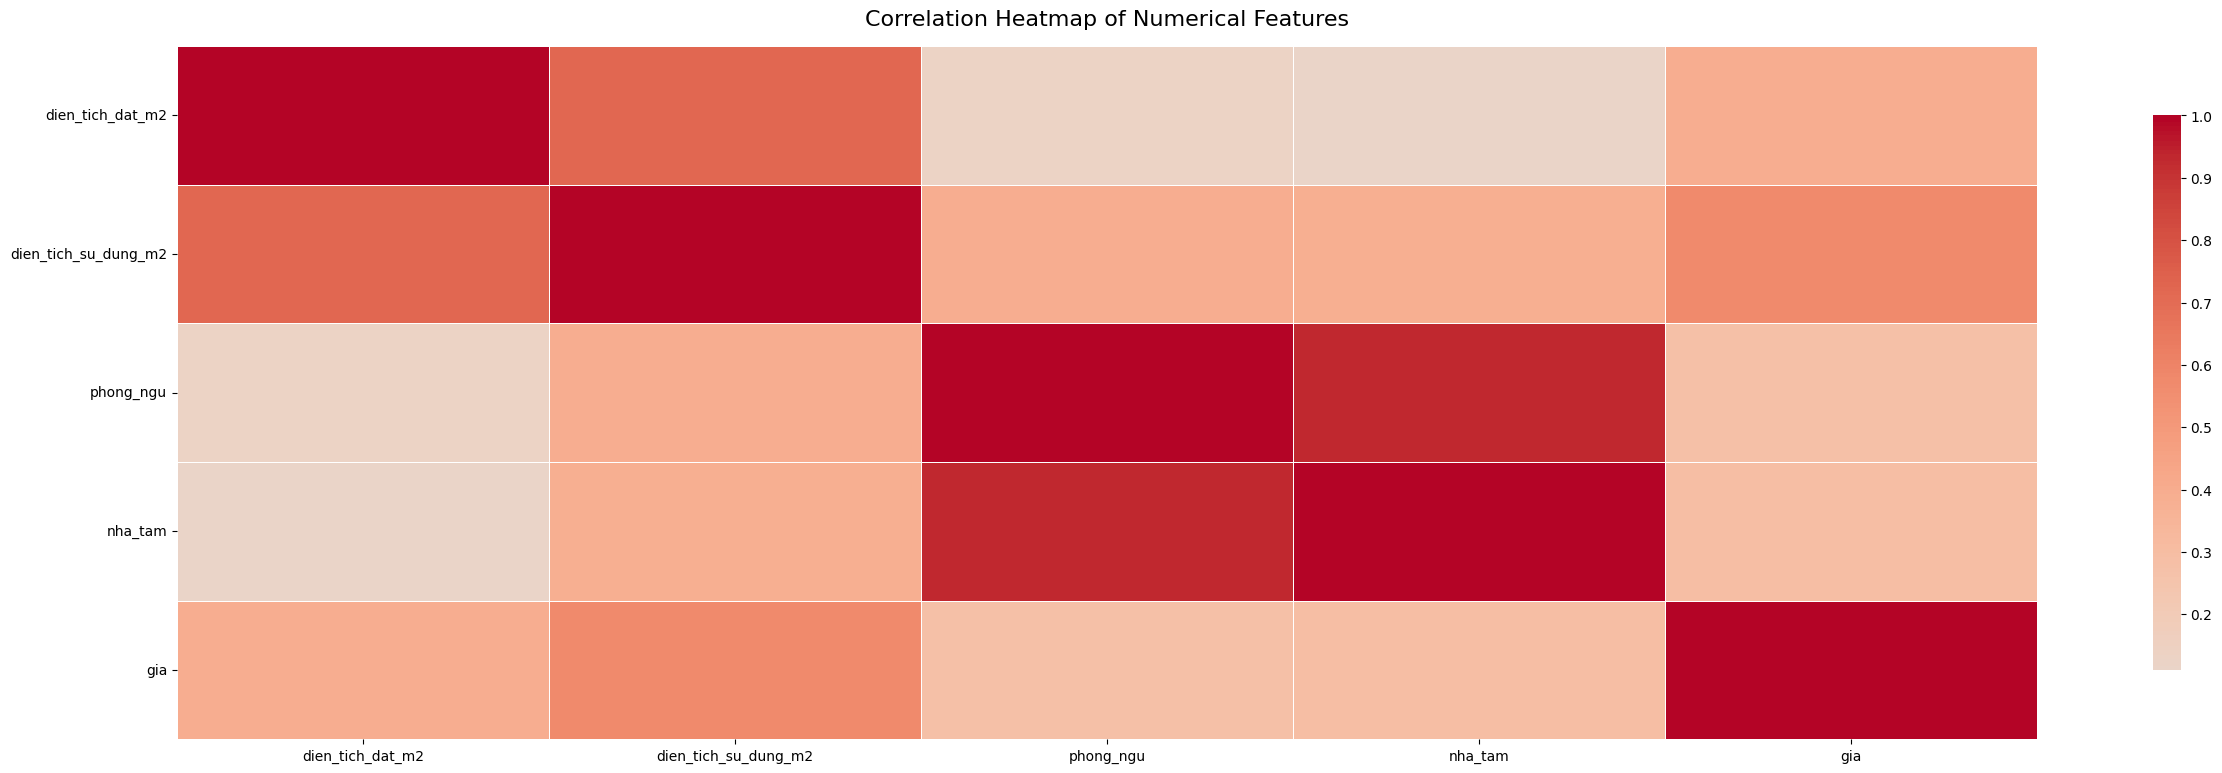

In [30]:
# Visualization Heatmap of gia < 100
plt.figure(figsize=(30, 9))
sns.heatmap(
    df_data[df_data['gia'] < 100].corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()

### 3.3 Heatmap when data is log(price)

In [31]:
df = df_data.copy()
df['gia_log'] = np.log1p(df['gia'])
corr_s = df[['dien_tich_dat_m2','dien_tich_su_dung_m2','phong_ngu','nha_tam','gia_log']].corr(method='spearman')

corr_s


,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia_log
dien_tich_dat_m2,1.000000,0.648544,0.312480,0.273941,0.679851
dien_tich_su_dung_m2,0.648544,1.000000,0.542009,0.526185,0.697303
phong_ngu,0.312480,0.542009,1.000000,0.895140,0.475966
nha_tam,0.273941,0.526185,0.895140,1.000000,0.476575
gia_log,0.679851,0.697303,0.475966,0.476575,1.000000


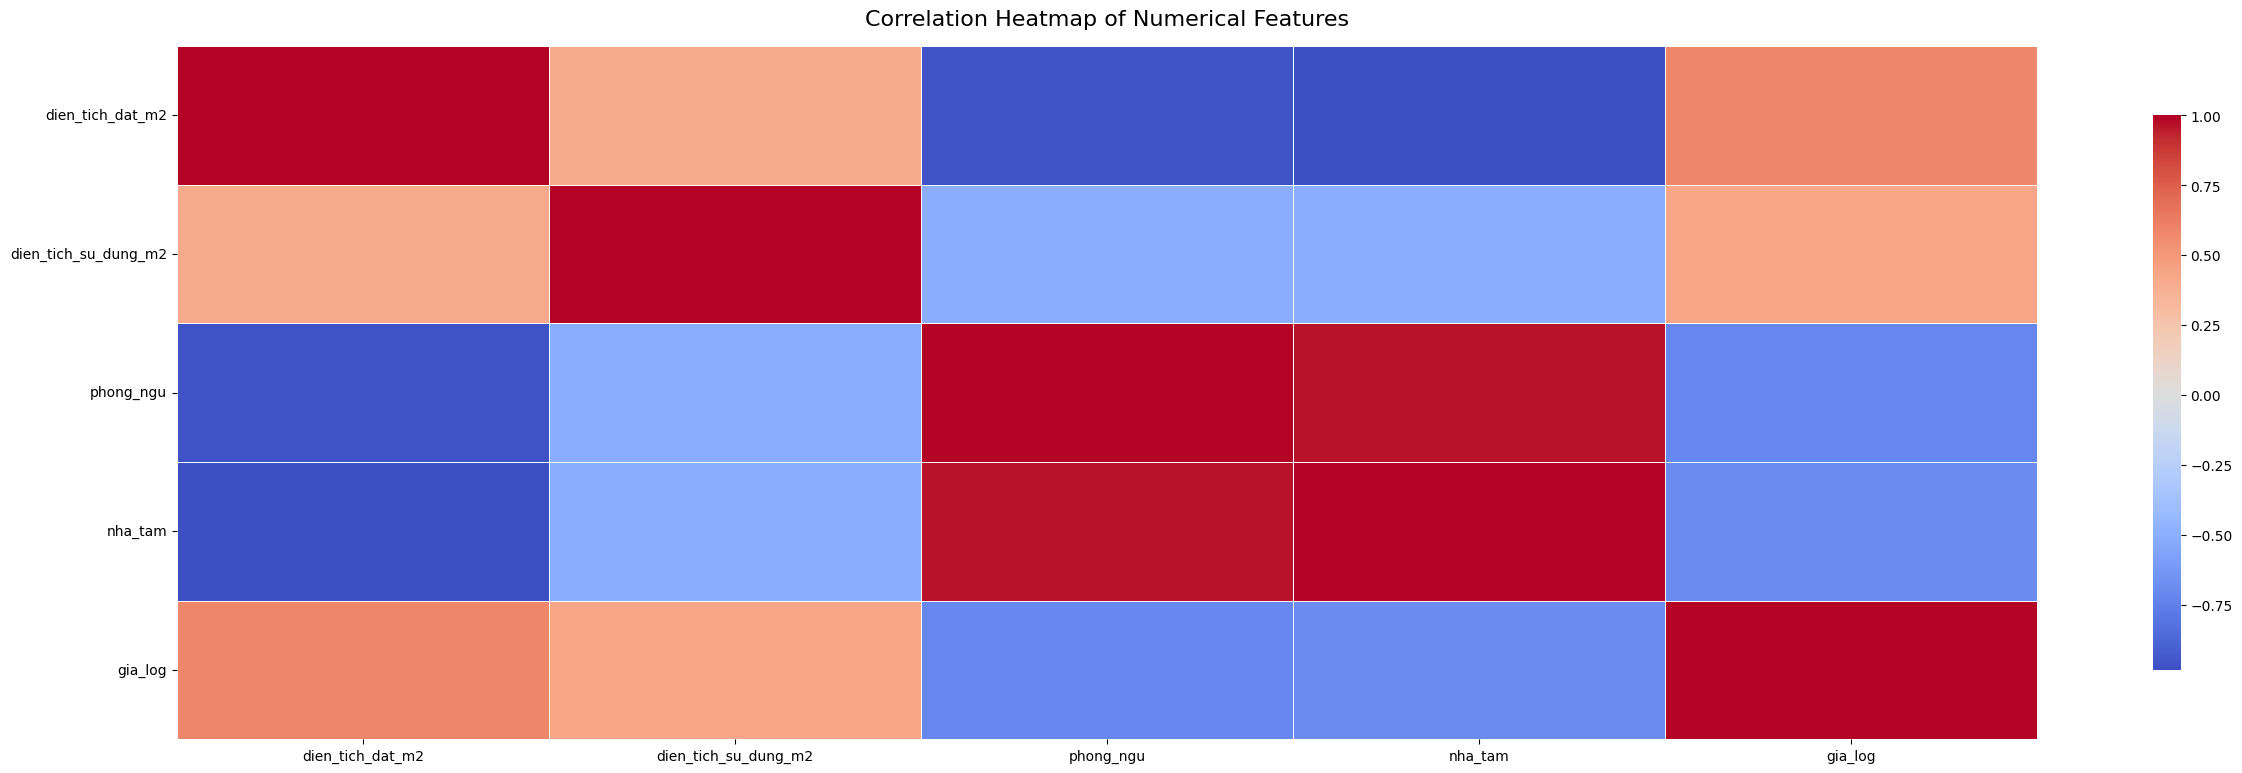

In [32]:
plt.figure(figsize=(30, 9))
sns.heatmap(
    corr_s.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()


## 4. Boxplot

### 4.1 Boxplot with full data

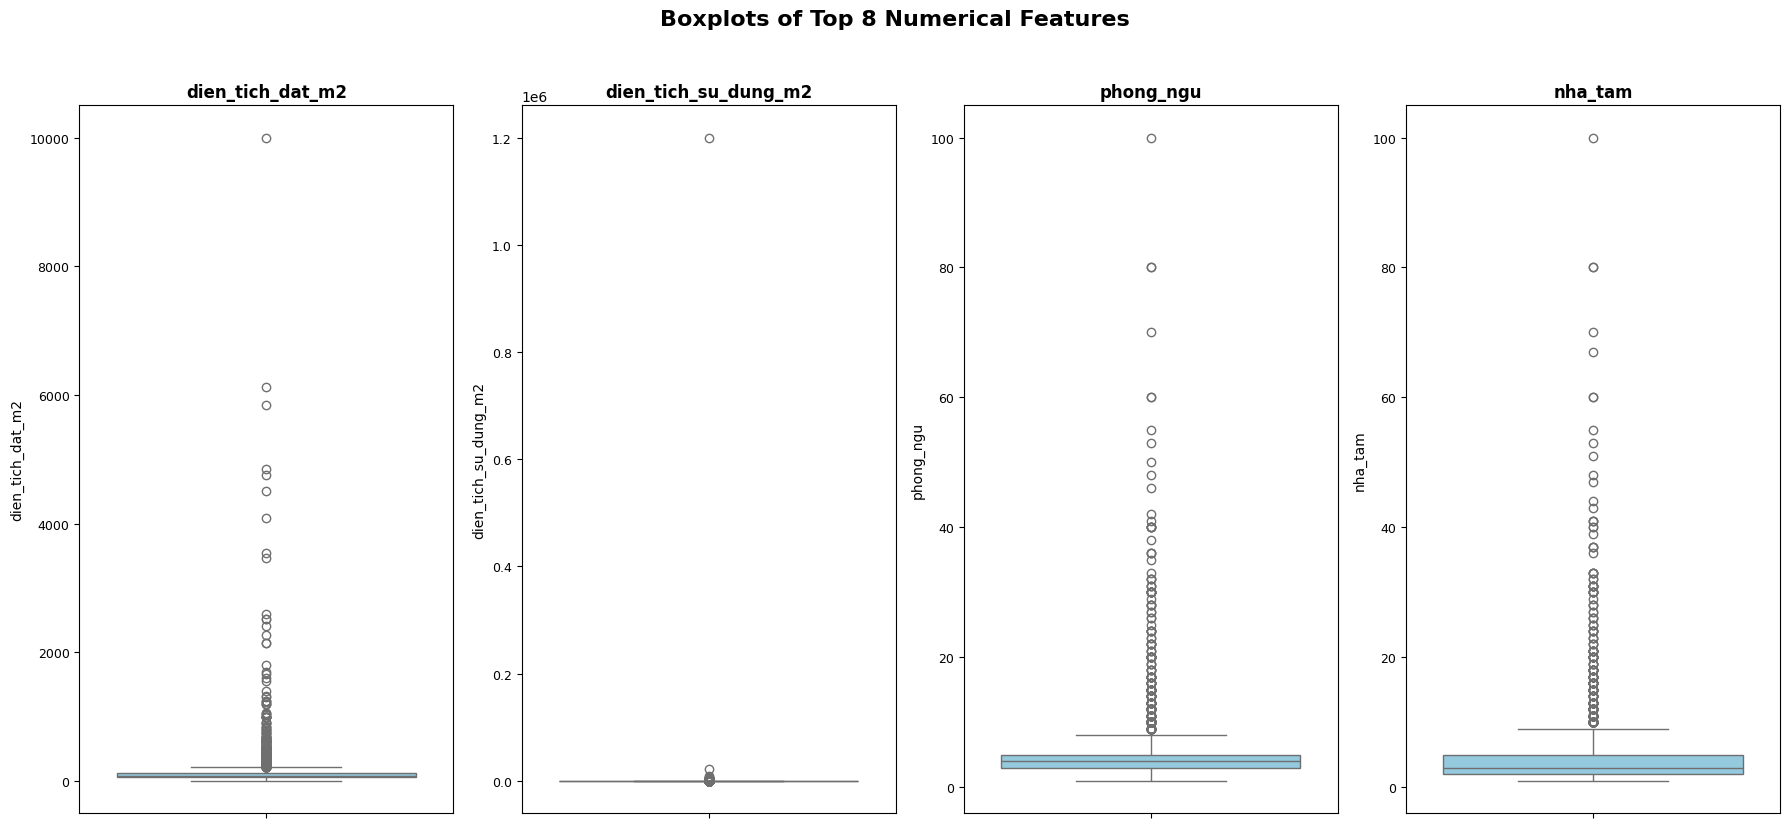

In [33]:
# Chọn 8 đặc trưng numeric quan trọng nhất dựa trên tương quan với gia
important_cols = [
    'dien_tich_dat_m2',
    'dien_tich_su_dung_m2',
    'phong_ngu',
    'nha_tam',
]

fig, axes = plt.subplots(1, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=df_data, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top 8 Numerical Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

### 3.2 Boxplot with clean data

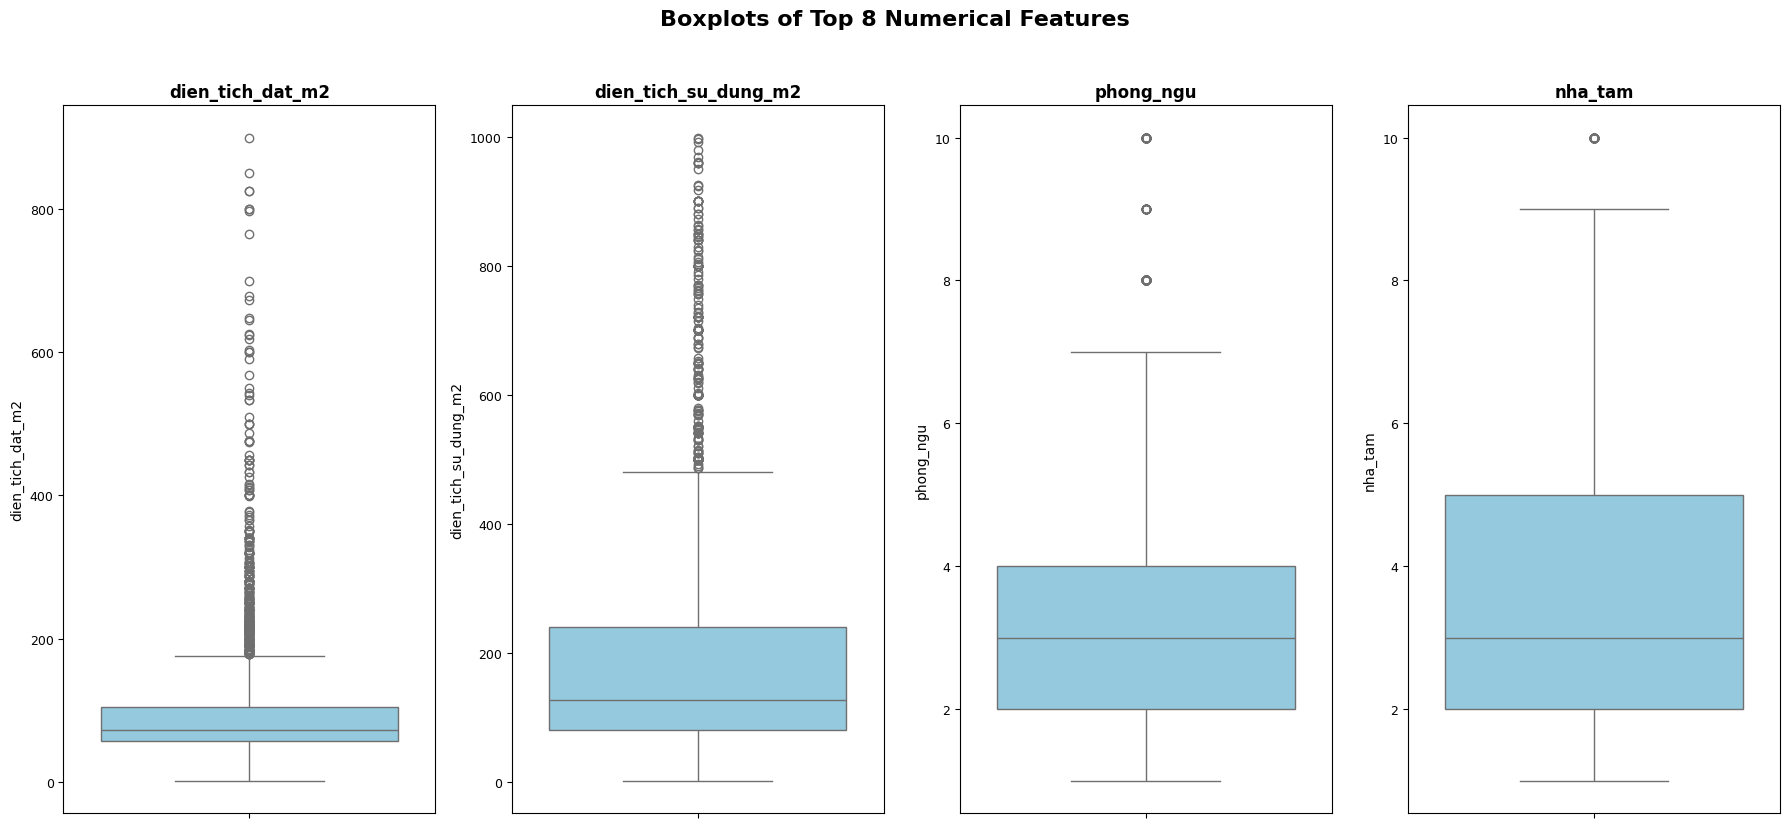

In [34]:
df_viz = df[
    (df['dien_tich_su_dung_m2'] < 1000) &
    (df['dien_tich_dat_m2'] < 1000) &
    (df['phong_ngu'] <= 10) &
    (df['nha_tam'] <= 10)
]
fig, axes = plt.subplots(1, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=df_viz, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top 8 Numerical Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

### 3.3 Data after clean

#### Information of data clean

In [35]:
df_clean = df_data[
    (df_data['dien_tich_dat_m2'] <= 1000) &
    (df_data['dien_tich_su_dung_m2'] <= 2000) &
    (df_data['phong_ngu'] <= 10) &
    (df_data['nha_tam'] <= 10)
]
print(df_clean.shape)

(4011, 6)


In [36]:
df_clean.head()

,quan,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia
2,10,53.0,53.0,2.0,2.0,4.3
4,10,102.0,102.0,2.0,2.0,3.7
5,10,79.0,79.0,2.0,2.0,4.9
6,10,72.0,72.0,2.0,2.0,5.5
7,10,103.0,103.0,3.0,2.0,8.2


In [37]:
df_clean.describe()

,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia
count,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000
mean,101.288369,212.188125,3.744453,3.621541,21.184398
std,92.054532,233.141943,1.768036,1.928491,45.973800
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,57.000000,80.000000,2.500000,2.000000,4.900000
50%,75.000000,130.000000,3.000000,3.000000,8.990000
75%,110.000000,250.000000,5.000000,5.000000,18.500000
max,1000.000000,2000.000000,10.000000,10.000000,1279.999000


#### Heatmap of Data clean

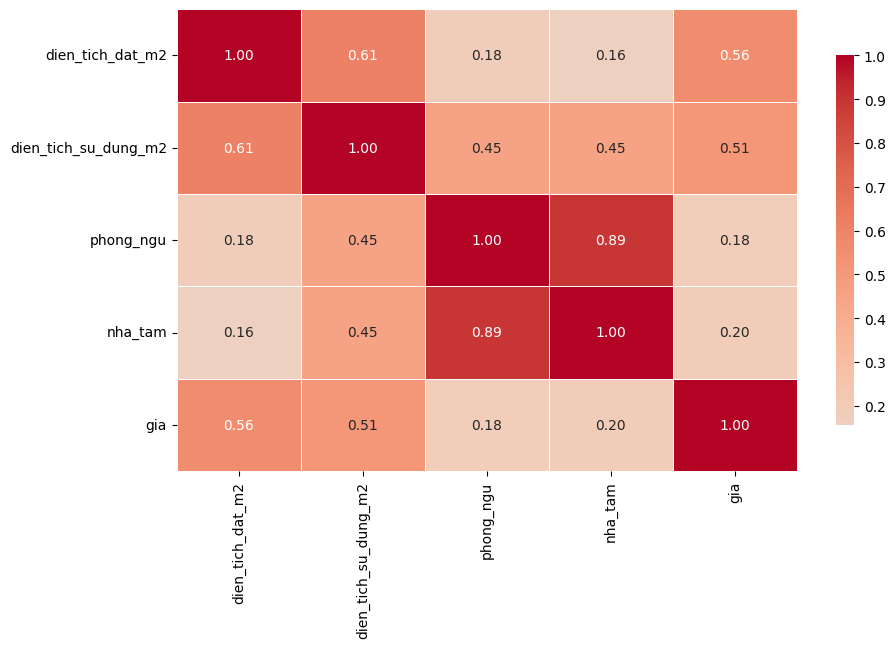

In [38]:
importance_cols = [
    'dien_tich_dat_m2',
    'dien_tich_su_dung_m2',
    'phong_ngu',
    'nha_tam',
]
heatmap_data = df_clean[importance_cols + ['gia']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.show()